This script encompasses  the following points-

1.Import libraries and data
2.Data wrangling and consistency
3.Data cleaning
4.Hypothesis - A potential correlation exists between higher boat prices and a reduction in the number of views, implying that an increase in boat price might lead to a decrease in views
5.Conclusions

In [1]:
Step-1 Install the scikit-learn library.

!pip install scikit-learn 

In [2]:
Step-2 Import the libraries you need into a new notebook, including any necessary modules from scikit-learn

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json

In [4]:
Step-3 Clean your data so that it’s ready for analysis.

#Path setup

path=r"C:\Users\ranji\Downloads\Submitted tasks\Sourcing Open Data_7\Execrise 2"

In [5]:
df = pd.read_csv(os.path.join(path, 'Cleaned_data.csv'), index_col = False)

In [6]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City,Engine Type,Condition,age_group,Price_groub,Views Performance
0,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,3263,15198.0,Switzerland,Le Landeron (NE),Unleaded,Used,Very Old (built before 2000),Cheap (less than 44290),Good (more than 170)
1,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,2432,35700.0,Switzerland,Neuenburgersee,Diesel,Used,Very Old (built before 2000),Cheap (less than 44290),Good (more than 170)
2,Bowrider,Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,2261,128418.0,Switzerland,Lago Maggiore,Diesel,Used,Old (built between 2000-2017),Expensive (more than 250000),Good (more than 170)
3,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,2154,949000.0,Other,None,Diesel,Used,Old (built between 2000-2017),Expensive (more than 250000),Good (more than 170)
4,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,2026,20298.0,Switzerland,Murtensee,Unleaded,Used,Very Old (built before 2000),Cheap (less than 44290),Good (more than 170)


In [7]:
df.shape

(8521, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8521 entries, 0 to 8520
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    8521 non-null   object 
 1   Manufacturer                 8521 non-null   object 
 2   Type                         8521 non-null   object 
 3   Year Built                   8521 non-null   int64  
 4   Length                       8521 non-null   float64
 5   Width                        8521 non-null   float64
 6   Material                     8521 non-null   object 
 7   Number of views last 7 days  8521 non-null   int64  
 8   EUR_price                    8521 non-null   float64
 9   Country                      8521 non-null   object 
 10  City                         8521 non-null   object 
 11  Engine Type                  6802 non-null   object 
 12  Condition                    8479 non-null   object 
 13  age_group         

#Data Wrangling & Cleaning

In [10]:
#dropping columns

columns_to_drop = ['Engine Type','Condition','age_group']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
#check for missing values

df.isnull().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
Price_groub                    0
Views Performance              0
dtype: int64

The data is complete; no missing values are present

In [12]:
dups = df.duplicated()
dups.shape

(8521,)

No duplicate values have been detected.

#check for outliers

<Axes: xlabel='Number of views last 7 days', ylabel='Count'>

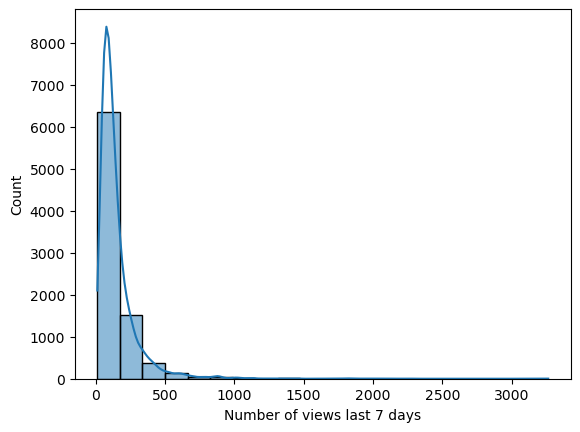

In [13]:
sns.histplot(df['Number of views last 7 days'], bins=20, kde = True)

The histogram does not display any outliers or extreme values, indicating that there is no need to perform any removal or adjustment based on extreme observations

Step - 4 Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

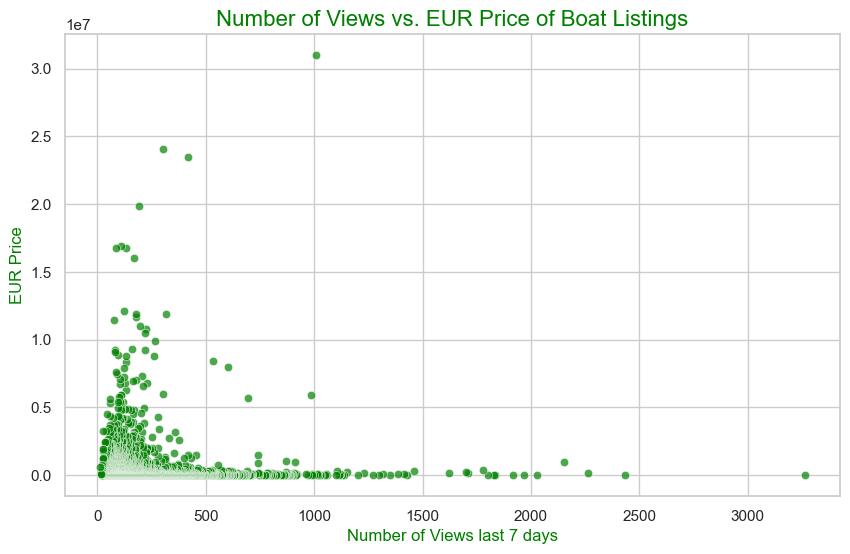

In [79]:
#Creating a scatter plot to explore the relationship between the 'Number of views' and 'Type' variables

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of views last 7 days', y='EUR_price', color='green', alpha=0.7)

# Set plot title and labels with color adjustments
plt.title('Number of Views vs. EUR Price of Boat Listings', color='green', fontsize=16)
plt.xlabel('Number of Views last 7 days', color='green', fontsize=12)
plt.ylabel('EUR Price', color='green', fontsize=12)

plt.savefig("Number of views vs EUR price of boats.png")
plt.show()

The model's outcome on the training set is similar to that of the one we have in the test set. This confirms what we supposed earlier: the model is applicable.

Step - 5 State your hypothesis in a markdown cell within your Jupyter notebook.

Hypothesis:The higher-priced boats are likely to attract fewer views compared to lower-priced ones.

Step - 6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [46]:
X = df['Number of views last 7 days'].values.reshape(-1, 1)
y = df['EUR_price'].values.reshape(-1, 1)

In [47]:
X

array([[3263],
       [2432],
       [2261],
       ...,
       [  18],
       [  15],
       [  13]], dtype=int64)

In [48]:
y

array([[ 15198.],
       [ 35700.],
       [128418.],
       ...,
       [ 62800.],
       [ 53900.],
       [580000.]])

Step-7 Split data into a training set and a test set

In [52]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
Step-8 Run a linear regression on the data.

In [54]:
#Create a regression object

from sklearn.linear_model import LinearRegression
regression = LinearRegression()  # Regression object, which will be fit onto the training set

In [55]:
LinearRegression()

LinearRegression()

In [56]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [57]:
#Predict the values of y using X.

y_predicted = regression.predict(X_test)
        

Step - 9 Create a plot that shows the regression line on the test set.

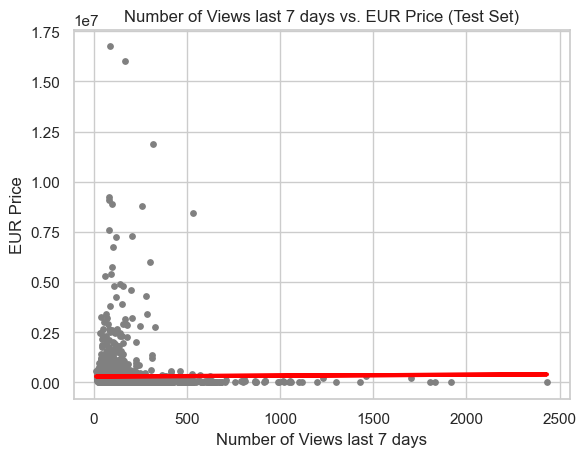

In [80]:
plt.scatter(X_test, y_test, color='gray', s=15)
plt.plot(X_test, y_predicted, color='red', linewidth=3)

plt.title('Number of Views last 7 days vs. EUR Price (Test Set)')
plt.xlabel('Number of Views last 7 days')
plt.ylabel('EUR Price')

plt.savefig("Number of views vs EUR price.png")
plt.show()

Step-11 Check the model performance statistics—MSE and R2 score.

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_predicted, squared=False)

r2 = r2_score(y_test, y_predicted) 

In [61]:
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)


Slope: [[43.58383018]]
Mean squared error: 855833.1591929698
R2 score: -0.0010302790674912021


In [62]:
y_predicted

array([[297683.54088292],
       [299252.55876954],
       [311499.61505121],
       ...,
       [301083.07963726],
       [300777.99282597],
       [299339.7264299 ]])

Step-12 Compare the predicted y values with the actual y values in a dataframe.

In [63]:
# Create a DataFrame comparing actual and predicted values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

# Display the first 30 rows of the DataFrame
print(data.head(30))


       Actual      Predicted
0    870000.0  297683.540883
1     23000.0  299252.558770
2      8990.0  311499.615051
3    670000.0  297988.627694
4    580000.0  296681.112789
5     15300.0  323223.665371
6    179500.0  300821.576656
7    239000.0  298337.298336
8     79900.0  304351.866901
9    249900.0  299644.813241
10  1092637.0  303131.519656
11    79900.0  298468.049826
12   590000.0  298642.385147
13    49999.0  299034.639619
14     6048.9  298468.049826
15    59900.0  301431.750279
16    27000.0  299819.148562
17   129000.0  300690.825166
18   466830.0  299383.310260
19    59500.0  304918.456693
20   125000.0  298380.882166
21    70000.0  299993.483883
22    45900.0  300080.651543
23   111350.0  303567.357958
24   175000.0  299906.316222
25    47500.0  307838.573316
26    38900.0  303131.519656
27    65990.0  303916.028599
28    64000.0  300516.489845
29  1144500.0  302259.843052


Step - 13 Include your thoughts on how well the model performed on the test set in a markdown cell.

The extremely high Mean Squared Error (MSE) and low R-squared (R2) score signify that the the model's performance  align with our initial hypothesis.
It means our assumption is valid, the price of the boat appear to have a significant influence on its popularity or the number of views it receives. 

In [ ]:
#Compare how the regression fits the training set

In [68]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [69]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [70]:
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[43.58383018]]
Mean squared error: 1030807961228.6213
R2 score: 4.446400329582989e-05


In [ ]:
# Visualizing the training set results.

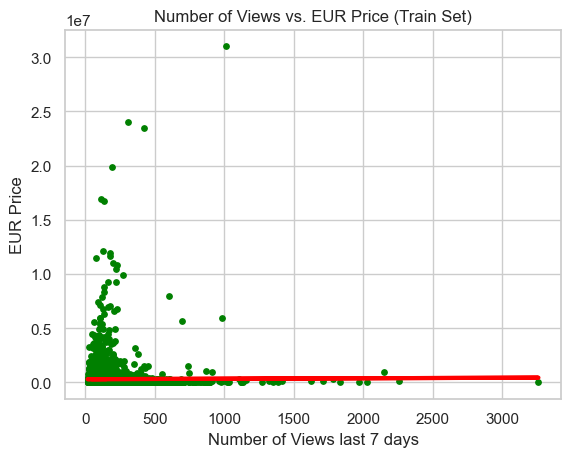

In [81]:
plt.scatter(X_train, y_train, color='green', s=15)
plt.plot(X_train, y_predicted_train, color='red', linewidth=3)
plt.title('Number of Views vs. EUR Price (Train Set)')
plt.xlabel('Number of Views last 7 days')
plt.ylabel('EUR Price')
plt.savefig("Number of Views last 7 days vs EUR Price.png")
plt.show()

Step - 12 Compare the predicted y values with the actual y values in a dataframe.

The models's outcome on the training set is similar to that of the one we have in the test set. 

Step - 13 Include your thoughts on how well the model performed on the test set in a markdown cell.

In [72]:
#To further investigate the validity of our initial hypothesis 

most_viewed = df[df['Number of views last 7 days'] > 700].sort_values('Number of views last 7 days', ascending=False)

In [73]:
most_viewed

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City,Price_groub,Views Performance
0,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,3263,15198.0,Switzerland,Le Landeron (NE),Cheap (less than 44290),Good (more than 170)
1,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,2432,35700.0,Switzerland,Neuenburgersee,Cheap (less than 44290),Good (more than 170)
2,Bowrider,Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,2261,128418.0,Switzerland,Lago Maggiore,Expensive (more than 250000),Good (more than 170)
3,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,2154,949000.0,Other,None,Expensive (more than 250000),Good (more than 170)
4,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,2026,20298.0,Switzerland,Murtensee,Cheap (less than 44290),Good (more than 170)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Motor Yacht,Glastron power boats,"Used boat,Unleaded",2016,7.67,2.55,GRP,711,97410.0,Switzerland,Lake Constance,Expensive (more than 250000),Good (more than 170)
110,Bowrider,Larson power boats,"Used boat,Unleaded",1998,6.07,2.47,GRP,709,19380.0,Switzerland,Lake Geneva,Cheap (less than 44290),Good (more than 170)
111,Cabin Boat,Rinker power boats,"Used boat,Unleaded",2008,7.47,2.59,GRP,708,57630.0,Switzerland,Lake Geneva,Medium (44290-250000),Good (more than 170)
112,Motor Yacht,Sunseeker power boats,Used boat,1990,9.42,3.30,GRP,706,35700.0,Switzerland,Ermatingen,Cheap (less than 44290),Good (more than 170)


In [74]:
file_path = r"C:\Users\ranji\Downloads\Submitted tasks\Sourcing Open Data_7\Execrise 4\Cleaned_Data_MachineLearning.csv"
df.to_csv(file_path, index=False)

Our initial hypothesis suggested that an increase in boat price might result in a decrease in views. Surprisingly, the performance statistics, including the Mean Squared Error (MSE) and R-squared (R2) score, aligned with our initial assumption. However, to validate the hypothesis further, we conducted a more in-depth investigation. The findings revealed that the price of the boat does not significantly impact its popularity in terms of views. Intriguingly, the most viewed boat in the dataset is not among the highest-priced entries. 
The performance of the MSE and R2 score metrics played a crucial role in guiding this discovery, demonstrating their effectiveness in unraveling the underlying relationship between boat price and popularity.